In [1]:
print("This is for Caitlín's rough code")

This is for Caitlín's rough code


In [2]:
#libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
#import data
os.chdir("..")
data = pd.read_csv("data/bikedata.csv")
data.head()

,Unnamed: 0,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,STATUS
0,1,2018-08-01 12:30:02,CHARLEMONT PLACE,40,28,12,Open
1,2,2018-08-01 12:35:02,CHARLEMONT PLACE,40,28,12,Open
2,3,2018-08-01 12:40:02,CHARLEMONT PLACE,40,28,12,Open
3,4,2018-08-01 12:45:02,CHARLEMONT PLACE,40,28,12,Open
4,5,2018-08-01 12:50:02,CHARLEMONT PLACE,40,28,12,Open


In [4]:
#Calculate bike usage
data["BIKE.USAGE"] = data["AVAILABLE.BIKE.STANDS"]/data["BIKE.STANDS"]
data.head()

,Unnamed: 0,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,AVAILABLE.BIKES,STATUS,BIKE.USAGE
0,1,2018-08-01 12:30:02,CHARLEMONT PLACE,40,28,12,Open,0.7
1,2,2018-08-01 12:35:02,CHARLEMONT PLACE,40,28,12,Open,0.7
2,3,2018-08-01 12:40:02,CHARLEMONT PLACE,40,28,12,Open,0.7
3,4,2018-08-01 12:45:02,CHARLEMONT PLACE,40,28,12,Open,0.7
4,5,2018-08-01 12:50:02,CHARLEMONT PLACE,40,28,12,Open,0.7


In [5]:
bike_dates = pd.to_datetime(data.TIME, format = "%Y-%m-%d %H:%M:%S")
print(bike_dates)

0         2018-08-01 12:30:02
1         2018-08-01 12:35:02
2         2018-08-01 12:40:02
3         2018-08-01 12:45:02
4         2018-08-01 12:50:02
                  ...        
1029255   2022-01-01 23:35:02
1029256   2022-01-01 23:40:02
1029257   2022-01-01 23:45:02
1029258   2022-01-01 23:50:02
1029259   2022-01-01 23:55:02
Name: TIME, Length: 1029260, dtype: datetime64[ns]


In [6]:
bike_dates.dt.date
date_vector = pd.DatetimeIndex(bike_dates.dt.date)
print(date_vector)

DatetimeIndex(['2018-08-01', '2018-08-01', '2018-08-01', '2018-08-01',
               '2018-08-01', '2018-08-01', '2018-08-01', '2018-08-01',
               '2018-08-01', '2018-08-01',
               ...
               '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
               '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
               '2022-01-01', '2022-01-01'],
              dtype='datetime64[ns]', name='TIME', length=1029260, freq=None)


In [ ]:
#Parse dates and times
data.TIME = pd.to_datetime(data.TIME, format = "%Y-%m-%d %H:%M:%S")
print(bike_dates)
data["DATE"] = pd.DatetimeIndex(data.TIME.dt.date)
data.head()
#Calculate bike usage
data["BIKE.USAGE"] = data["AVAILABLE.BIKE.STANDS"]/data["BIKE.STANDS"]
data.head()

In [10]:
#create masks
dataCP = data[data.NAME == "CHARLEMONT PLACE"]
dataSG = data[data.NAME == "ST. STEPHEN'S GREEN EAST"]
dataPR = data[data.NAME == "PHIBSBOROUGH ROAD"]

In [11]:
dataPR.head

<bound method NDFrame.head of          Unnamed: 0                 TIME               NAME  BIKE.STANDS  \
276             277  2018-08-01 12:30:02  PHIBSBOROUGH ROAD           40   
277             278  2018-08-01 12:35:02  PHIBSBOROUGH ROAD           40   
278             279  2018-08-01 12:40:02  PHIBSBOROUGH ROAD           40   
279             280  2018-08-01 12:45:02  PHIBSBOROUGH ROAD           40   
280             281  2018-08-01 12:50:02  PHIBSBOROUGH ROAD           40   
...             ...                  ...                ...          ...   
1029255     1029256  2022-01-01 23:35:02  PHIBSBOROUGH ROAD           40   
1029256     1029257  2022-01-01 23:40:02  PHIBSBOROUGH ROAD           40   
1029257     1029258  2022-01-01 23:45:02  PHIBSBOROUGH ROAD           40   
1029258     1029259  2022-01-01 23:50:02  PHIBSBOROUGH ROAD           40   
1029259     1029260  2022-01-01 23:55:02  PHIBSBOROUGH ROAD           40   

         AVAILABLE.BIKE.STANDS  AVAILABLE.BIKES STATUS  B

In [ ]:
print(dataPR.DATE)

In [ ]:
PRdate_vector = pd.DatetimeIndex(dataPR.DATE.dt.date)
print(PRdate_vector)

In [ ]:
# Approach 3
idx_day_of_interest = 0;
Day_of_interest = PRdate_vector[idx_day_of_interest] # pearse_dates.dt.date.iloc[idx_day_of_interest]
Day_index = PRdate_vector == Day_of_interest
print(Day_of_interest)

dataPR[Day_index].head

In [ ]:
phibs_day_of_interest = dataPR.DATE[Day_index]
time = phibs_day_of_interest.dt.hour
stands = dataPR[Day_index]['AVAILABLE.BIKE.STANDS']
bikes = dataPR[Day_index]['AVAILABLE.BIKES']
bikes

In [ ]:
plt.figure()
plt.title(f'Usage of the Phibsborough Road station on the {Day_of_interest}')
plt.plot(time, stands,'k')
plt.xlabel('Hours of the day')
plt.ylabel('Available bike stands')
plt.title(f'Usage of the Phibsborough Road station on the {Day_of_interest}')

plt.figure()
plt.plot(time, bikes,'b')
plt.xlabel('Hours of the day')
plt.ylabel('Available bikes')
plt.show()

In [ ]:
# Group data by date and calculate mean bike usage
usage_by_date = dataPR.groupby('DATE')['BIKE.USAGE'].mean()

# Create a line plot
plt.plot(usage_by_date.index, usage_by_date.values)

# Set plot title and axis labels
plt.title('Average Bike Usage for Phibsborough Road')
plt.xlabel('Date')
plt.ylabel('Bike Usage')

# Show the plot
plt.show()

In [ ]:
CP_daily_avg = dataCP.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
CP_date_vector = pd.DatetimeIndex(dataCP["DATE"].dt.date)

PR_daily_avg = dataPR.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
PR_date_vector = pd.DatetimeIndex(dataPR["DATE"].dt.date)

SG_daily_avg = dataSG.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
SG_date_vector = pd.DatetimeIndex(dataSG["DATE"].dt.date)

In [ ]:
#datavis
usageFig, axes = plt.subplots(3, 1, figsize=(20,18))
sns.lineplot(ax=axes[0],x = CP_daily_avg.index, y = CP_daily_avg.values)
axes[0].set_title('Charlemont Place')
sns.lineplot(ax=axes[1],x = PR_daily_avg.index, y = PR_daily_avg.values)
axes[1].set_title('Phibsborough Road')
sns.lineplot(ax=axes[2],x = SG_daily_avg.index, y = SG_daily_avg.values)
axes[2].set_title("St. Stephen's Green East")


In [ ]:
CP_weekly_avg = dataCP.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
PR_weekly_avg = dataPR.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()
SG_weekly_avg = dataSG.groupby(pd.Grouper(key='DATE', freq='W'))['BIKE.USAGE'].mean()


In [ ]:
usageFig, axes = plt.subplots(3, 1, figsize=(20,18))

sns.barplot(ax=axes[0], x=CP_weekly_avg.index, y=CP_weekly_avg.values)
axes[0].set_title('Charlemont Place')

sns.barplot(ax=axes[1], x=PR_weekly_avg.index, y=PR_weekly_avg.values)
axes[1].set_title('Phibsborough Road')

sns.barplot(ax=axes[2], x=SG_weekly_avg.index, y=SG_weekly_avg.values)
axes[2].set_title("St. Stephen's Green East")

In [ ]:


# Filter data for year 2020
dataCP_2020 = dataCP[dataCP['TIME'].dt.year == 2020]
dataPR_2020 = dataPR[dataPR['TIME'].dt.year == 2020]
dataSG_2020 = dataSG[dataSG['TIME'].dt.year == 2020]

# Group data by week and calculate weekly average
CP_weekly_avg = dataCP_2020.groupby(pd.Grouper(key='TIME', freq='W'))['BIKE.USAGE'].mean()
PR_weekly_avg = dataPR_2020.groupby(pd.Grouper(key='TIME', freq='W'))['BIKE.USAGE'].mean()
SG_weekly_avg = dataSG_2020.groupby(pd.Grouper(key='TIME', freq='W'))['BIKE.USAGE'].mean()

# Create bar plot
fig, axes = plt.subplots(3, 1, figsize=(20,18))
sns.barplot(ax=axes[0], x=CP_weekly_avg.index, y=CP_weekly_avg.values)
axes[0].set_title('Charlemont Place')
sns.barplot(ax=axes[1], x=PR_weekly_avg.index, y=PR_weekly_avg.values)
axes[1].set_title('Phibsborough Road')
sns.barplot(ax=axes[2], x=SG_weekly_avg.index, y=SG_weekly_avg.values)
axes[2].set_title("St. Stephen's Green East")

plt.show()

In [13]:
# Filter the data to include only the year 2020:
data_2020 = data[data['TIME'].str.startswith('2020')]

# Group the data by month and calculate the average bike usage for each month:
monthly_avg = data_2020.groupby(data_2020['TIME'].dt.strftime('%B'))['BIKE.USAGE'].mean()


AttributeError: Can only use .dt accessor with datetimelike values

In [37]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [38]:
df = pd.read_csv("data/stations.csv")
df.head()

,Unnamed: 0,NAME,LATITUDE,LONGITUDE,BIKE.STANDS
0,1,CLARENDON ROW,53.340927,-6.262501,31
1,2,BLESSINGTON STREET,53.356770,-6.268140,20
2,3,BOLTON STREET,53.351181,-6.269859,20
3,4,GREEK STREET,53.346874,-6.272976,20
4,5,CHARLEMONT PLACE,53.330662,-6.260177,40


[1 0 0 0 1 1 2 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 2 1 1 0
 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 1 1 2 0 0 0 0 0 0 0 0 0 0 0 1
 1 0]


<AxesSubplot:xlabel='LATITUDE', ylabel='LONGITUDE'>

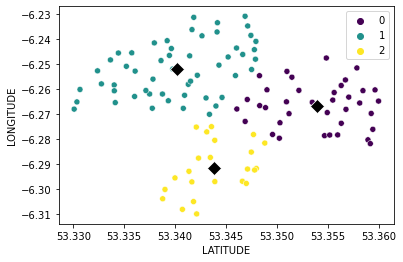

In [46]:
X = df[['LATITUDE', 'LONGITUDE']]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42).fit(X_std)

df['CLUSTER'] = kmeans.labels_

print(kmeans.labels_)

sns.scatterplot(x="LATITUDE", y="LONGITUDE",hue = 'CLUSTER', data=df, palette='viridis')

# Add the centroids to the plot as black diamonds
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1],marker='D', s=100, color='black')


<AxesSubplot:xlabel='LATITUDE', ylabel='LONGITUDE'>

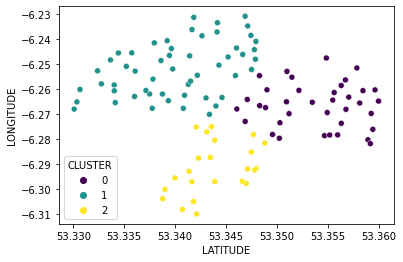

In [32]:
sns.scatterplot(x="LATITUDE", y="LONGITUDE",hue = 'CLUSTER', data=df, palette='viridis')



<AxesSubplot:xlabel='LATITUDE', ylabel='LONGITUDE'>

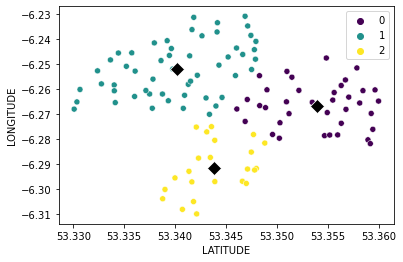

In [36]:

sns.scatterplot(x="LATITUDE", y="LONGITUDE",hue = 'CLUSTER', data=df, palette='viridis')


# Add the centroids to the plot as black diamonds
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1],marker='D', s=100, color='black')


[[53.35604136 -6.27203773]
 [53.34108627 -6.24685977]
 [53.34365711 -6.29759778]]


<AxesSubplot:xlabel='LATITUDE', ylabel='LONGITUDE'>

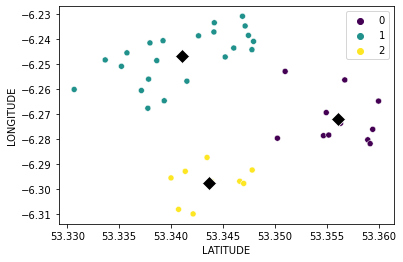

In [47]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("data/stations.csv")

# Filter the dataframe to include only bike stands = 40
df = df[df['BIKE.STANDS'] == 40]

# Create a subset of the dataset containing only the latitude and longitude columns
X = df[['LATITUDE', 'LONGITUDE']]

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_std)

# Add the cluster labels to the dataframe
df['CLUSTER'] = kmeans.labels_

# Print the centroids of each cluster
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print(centroids)

# Create a scatter plot of the data points colored by cluster
sns.scatterplot(x="LATITUDE", y="LONGITUDE",hue = 'CLUSTER', data=df, palette='viridis')

# Add the centroids to the plot as black diamonds
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1],marker='D', s=100, color='black')
